In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
from scipy.spatial.distance import cdist

In [2]:
#reading data into data
data = pd.read_csv('onedayonehour.csv')
print("Input data and shape")
print(data.shape)
print("Type of data")
print(type(data))
print("Data")
print(data)
 

Input data and shape
(448, 7)
Type of data
<class 'pandas.core.frame.DataFrame'>
Data
                                                  LUID        Date   Latitude  \
0    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991715   
1    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991715   
2    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991751   
3    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991751   
4    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991751   
5    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991751   
6    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991751   
7    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991667   
8    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991667   
9    1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db...  2018-02-09  38.991667   
10   1693c816aabec8cf18

In [3]:
#2 features on which clustering should happen
f1 = data['Latitude'].values
f2 = data['Longitude'].values
print(type(f2[0]))
print(f2)

<class 'numpy.float64'>
[-76.94267576 -76.94267576 -76.94285589 -76.94285589 -76.94285589
 -76.94285589 -76.94285589 -76.94269608 -76.94269608 -76.94269608
 -76.94269608 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269201 -76.94269201 -76.94269201 -76.94269201 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94267257 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269633 -76.94269633 -76.94269633 -76.94269633 -76.94269633
 -76.94269633 -76.94267576 -76.94267576 -76.94267588 -76.94267588
 -76.94268802 -76.94268802 -76.94268802 -76.94268802 -76.94268802
 -76.94268802 -76.94271224 -76.94281604 -76.94281604 -76.94281604
 -76.94281604 -76.94289789 -76.94289789 -76.94289789 -76.94289789
 -76.94289789 -76.94281604 -76.94281604 -76.94281604

In [5]:
#zipping the features
X = np.array(list(zip(f1, f2)))

In [7]:
print(X[0])

[ 38.99171534 -76.94267576]


In [9]:
print(X[0][1])

-76.94267575842309


In [2]:
#reading data into data
data = pd.read_csv('fulldatetime.csv')
print("Input data and shape")
print(type(data))
data.head()
data.shape

Input data and shape
<class 'pandas.core.frame.DataFrame'>


(576574, 7)

In [3]:
date = ['2018-02-09']
week = data[data.Date.isin(date)]
print(week.shape)
print(week['Latitude'].max())
print(week['Latitude'].min())
print(" ")
print(week['Longitude'].max())
print(week['Longitude'].min())

(12968, 7)
38.99284373
0.0
 
0.0
-76.94401871


In [4]:
#2 features on which clustering should happen
f1 = week['Latitude'].values
f2 = week['Longitude'].values
print(type(f2[0]))
print(f2)

<class 'numpy.float64'>
[-76.94401871 -76.94401871 -76.94401871 ... -76.93634179 -76.93635074
 -76.9363418 ]


In [5]:
#zipping the features
X = np.array(list(zip(f1, f2)))

[[ 38.990997 -76.96352 ]
 [ 38.98553  -76.983154]
 [ 38.992565 -76.88208 ]]


Text(0.5,1,'Date vs Time for LUIDs')

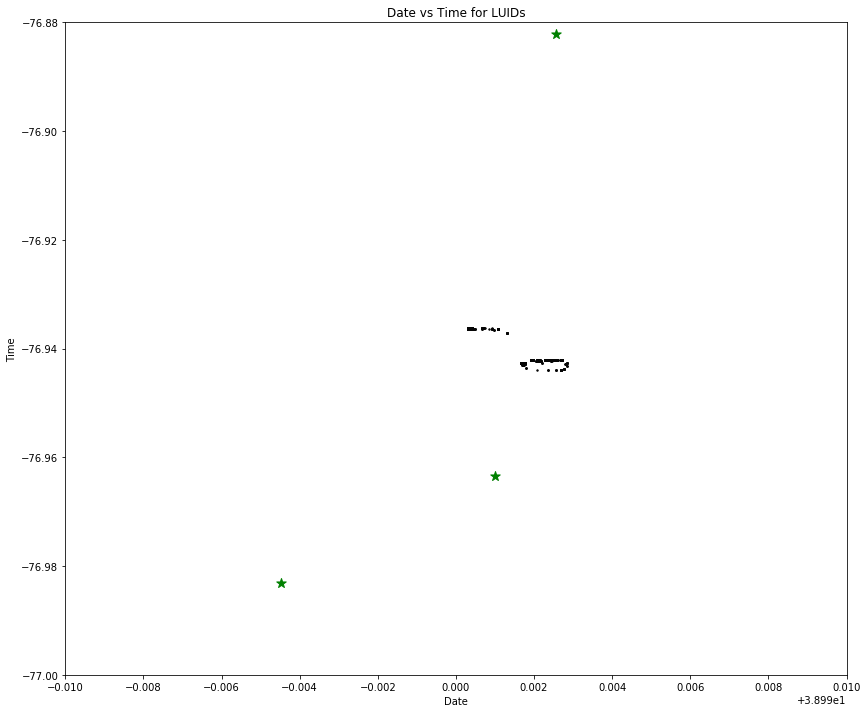

In [13]:
#Number of clusters = 3
k = 3

#Random centroids
C_x = np.random.uniform(38.98, 39, size=k)
C_y = np.random.uniform(-77, -76.88, size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

tick_spacingx = 0.002
tick_spacingy = 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
plt.scatter(C_x, C_y, marker='*', s = 100, c='g')
plt.ylim([-77, -76.88])
plt.xlim(38.98, 39)
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Date vs Time for LUIDs")

In [74]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from geopy.distance import vincenty

C=np.array(list(zip(C_x, C_y)), dtype = np.float32)

def distance_in_meters(X, y):
    return vincenty((X[0], X[1]), (y[0], y[1])).m

distance_matrix = pairwise_distances(X, metric=distance_in_meters)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [ ]:
dbscan = DBSCAN(metric='precomputed', eps=3, min_samples=10)
dbscan.fit(distance_matrix)

In [73]:
app = distance_in_meters(X, C)
print(app)
#print(distance_matrix)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [40]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [35]:
coords = week.as_matrix(columns=['Latitude', 'Longitude'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [36]:
print(coords)

[[ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 ...
 [ 38.9903658  -76.93634179]
 [ 38.99037094 -76.93635074]
 [ 38.9903658  -76.9363418 ]]


In [66]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(3)])
print('Number of clusters: {}'.format(num_clusters))
print(clusters)
print("clusters[0]")
print(clusters[0])
print("clusters[1]")
print(clusters[1])
print("clusters.size")
print(clusters[0][:])

Number of clusters: 2
0    [[38.99255839, -76.94401871], [38.99255839, -7...
1    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
2                                                   []
dtype: object
clusters[0]
[[ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 ...
 [ 38.9903658  -76.93634179]
 [ 38.99037094 -76.93635074]
 [ 38.9903658  -76.9363418 ]]
clusters[1]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
clusters.size
[[ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 [ 38.99255839 -76.94401871]
 ...
 [ 38.9903658  -76.93634179]
 [ 38.99037094 -76.93635074]
 [ 38.9903658  -76.9363418 ]]


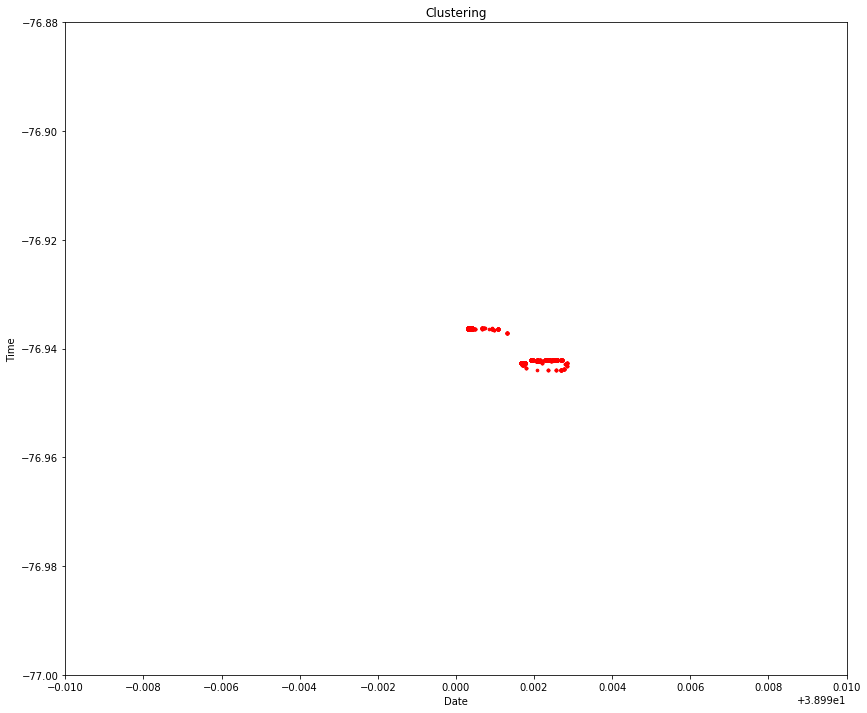

In [68]:
#Plotting after clustering
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots(figsize=(14, 12))

plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Clustering")

tick_spacingx = 0.002
tick_spacingy = 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))
plt.ylim([-77, -76.88])
plt.xlim(38.98, 39)

for i in range(len(clusters)):
        points = clusters[i][:]
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
# ax.scatter(clusters[:][0], s=10, c='#050505')

In [51]:
rs = rep_points.apply(lambda row: week[(week['lat']==row['lat'])(week['lon']==row['lon'])].iloc[0], axis=1)

KeyError: ('lat', 'occurred at index 0')

NameError: name 'rs' is not defined

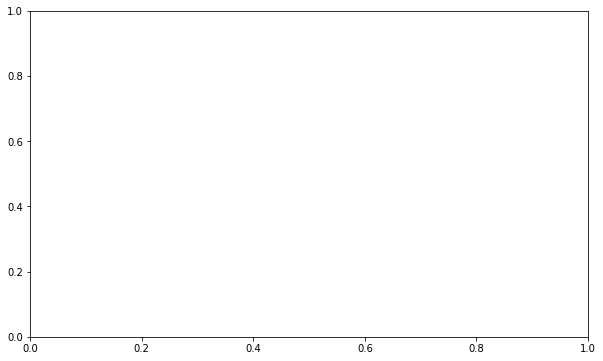

In [48]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

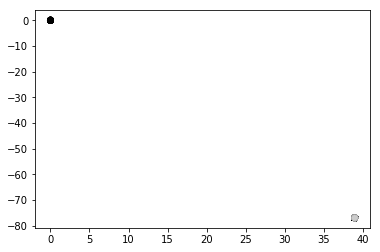

In [33]:
cmap = matplotlib.cm.get_cmap("Spectral")
plt.scatter(X[:,0], X[:,1], c=[plt.cm.nipy_spectral(float(i) /10) for i in cluster_labels]); 

In [17]:
earth_radius = 6371 #km
C_old = np.zeros(C.shape)
print(type(C_old))
print(C_old)
print(C)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
#Euclidean Distance Caculator
def distance(locs_1, locs_2, ax=1):
    lats1 = np.array([locs_1[0][0], locs_1[1][0], locs_1[2][0]])
    print("lats1")
    print(lats1)
    lats2 = np.array([locs_2[0][0], locs_2[1][0], locs_2[2][0]])
    print("lats2")
    print(lats2)
    lons1 = np.array([locs_1[0][1], locs_1[1][1], locs_1[2][1]])
    print("lons1")
    print(lons1)
    lons2 = np.array([locs_2[0][1], locs_2[1][1], locs_2[2][1]])
    print("lons2")
    print(lons2)
    lat_dif = np.radians(lats1 - lats2)

    long_dif = np.radians(lons1 - lons2)

    sin_d_lat = np.sin(lat_dif / 2.)
    sin_d_long = np.sin(long_dif / 2.)
    step_1 = (sin_d_lat ** 2) + (sin_d_long ** 2) * np.cos(np.radians(lats1[0])) * np.cos(np.radians(lats2[0])) 
    step_2 = 2 * np.arctan2(np.sqrt(step_1), np.sqrt(1-step_1))
    dist = step_2 * earth_radius
    print(dist)
    return dist

distance(C, C_old, None)

<class 'numpy.ndarray'>
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 38.990997 -76.96352 ]
 [ 38.98553  -76.983154]
 [ 38.992565 -76.88208 ]]
lats1
[38.990997 38.98553  38.992565]
lats2
[0. 0. 0.]
lons1
[-76.96352  -76.983154 -76.88208 ]
lons2
[0. 0. 0.]
[8884.74970324 8886.04080249 8877.89695797]


array([8884.74970324, 8886.04080249, 8877.89695797])

In [9]:
earth_radius = 6371 #km
# C_old = np.zeros(C.shape)
# print(type(C_old))
# print(C_old)
# print(C)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
print("X[0]")
print(X[0])
#Euclidean Distance Caculator
def dist(locs_1, locs_2, ax=1):
#     print("locs_1")
#     print(locs_1)
    
#     print("locs_2")
#     print(locs_2)
    lats1 = np.array([locs_1[0], locs_1[0], locs_1[0]])
#     print("lats1")
#     print(lats1)
    lats2 = np.array([locs_2[0][0], locs_2[1][0], locs_2[2][0]])
#     print("lats2")
#     print(lats2)
    lons1 = np.array([locs_1[1], locs_1[1], locs_1[1]])    
#     print("lons1")
#     print(lons1)
    lons2 = np.array([locs_2[0][1], locs_2[1][1], locs_2[2][1]])
#     print("lons2")
#     print(lons2)

    lat_dif = np.radians(lats1 - lats2)

    long_dif = np.radians(lons1 - lons2)

    sin_d_lat = np.sin(lat_dif / 2.)
    sin_d_long = np.sin(long_dif / 2.)
    step_1 = (sin_d_lat ** 2) + (sin_d_long ** 2) * np.cos(np.radians(lats1[0])) * np.cos(np.radians(lats2[0])) 
    step_2 = 2 * np.arctan2(np.sqrt(step_1), np.sqrt(1-step_1))
    dist = step_2 * earth_radius
#     print(dist)
    return dist

#dist(X[0], C_old, None)

X[0]
[ 38.99255839 -76.94401871]


In [10]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)
print(type(C_old))
print(C_old)
print(C)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = distance(C, C_old, None)
print(error.min())
# newerror = error[0][0]
# print(newerror)

<class 'numpy.ndarray'>
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 38.993378 -76.93437 ]
 [ 38.99808  -76.91022 ]
 [ 38.989697 -76.96603 ]]
8880.564140464645


In [19]:
#Loop will run till the error becomes zero
while error.min() != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
#         print(X[i])
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = distance(C, C_old, None)
    print(error)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lats1
[38.99155      nan  0.     ]
lats2
[38.990997 38.98553  38.992565]
lons1
[-76.9408      nan   0.    ]
lons2
[-76.96352  -76.983154 -76.88208 ]
[1.9639170e+00           nan 7.9979214e+03]
[1.9639170e+00           nan 7.9979214e+03]
lats1
[      nan 38.943443       nan]
lats2
[38.99155      nan  0.     ]
lons1
[      nan -76.84587       nan]
lons2
[-76.9408      nan   0.    ]
[nan nan nan]
[nan nan nan]
lats1
[38.943443       nan       nan]
lats2
[      nan 38.943443       nan]
lons1
[-76.84587       nan       nan]
lons2
[      nan -76.84587       nan]
[nan nan nan]
[nan nan nan]
lats1
[      nan 38.943443       nan]
lats2
[38.943443       nan       nan]
lons1
[      nan -76.84587       nan]
lons2
[-76.84587       nan       nan]
[nan nan nan]
[nan nan nan]
lats1
[38.943443       nan       nan]
lats2
[      nan 38.943443       nan]
lons1
[-76.84587       nan       nan]
lons2
[      nan -76.84587       nan]
[nan nan nan]
[nan nan nan]
lats1
[      nan 38.943443       nan]
lats2
[38.9

KeyboardInterrupt: 

In [ ]:
   #Plotting after clustering
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots(figsize=(14, 12))

plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Clustering")

tick_spacingx = 0.002
tick_spacingy = 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))
plt.ylim([-77, -76.88])
plt.xlim(38.98, 39)

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=20, c='#050505')


In [ ]:
#Final centroid cluster
print(C)